In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

In [2]:
class_desc = pd.read_csv('../input/class-descriptions.csv')

In [3]:
class_desc.head()

,label_code,description
0,/m/0100nhbf,Sprenger's tulip
1,/m/0104x9kv,Vinegret
2,/m/0105jzwx,Dabu-dabu
3,/m/0105ld7g,Pistachio ice cream
4,/m/0105lxy5,Woku


In [4]:
class_desc.shape

(19987, 2)

In [5]:
label2desc_all = class_desc.set_index('label_code')

In [6]:
label2desc_all.head()

,description
label_code,
/m/0100nhbf,Sprenger's tulip
/m/0104x9kv,Vinegret
/m/0105jzwx,Dabu-dabu
/m/0105ld7g,Pistachio ice cream
/m/0105lxy5,Woku


In [7]:
class_train = pd.read_csv('../input/classes-trainable.csv')

In [8]:
class_train.head()

,label_code
0,/m/0108_09c
1,/m/010dmf
2,/m/010jjr
3,/m/010l12
4,/m/010lq47b


In [9]:
class_train['label_code'].nunique()

7178

In [10]:
class_desc_train = pd.merge(left=class_train, right=class_desc, on='label_code', how='inner')

In [11]:
class_desc_train.shape

(7178, 2)

In [12]:
label2desc_train = class_desc_train.set_index('label_code')

In [13]:
label2desc_train.head()

,description
label_code,
/m/0108_09c,Summer snowflake
/m/010dmf,Isle of man tt
/m/010jjr,Amusement park
/m/010l12,Roller coaster
/m/010lq47b,Witch hat


In [14]:
sub = pd.read_csv('../input/stage_1_sample_submission.csv')

In [15]:
sub.head()

,image_id,labels
0,2b2b327132556c767a736b3d,/m/0sgh53y /m/0g4cd0
1,2b2b394755692f303963553d,/m/0sgh53y /m/0g4cd0
2,2b2b42584e6d445937444d3d,/m/0sgh53y /m/0g4cd0
3,2b2b44744e57674270616f3d,/m/0sgh53y /m/0g4cd0
4,2b2b4b425a592b683059493d,/m/0sgh53y /m/0g4cd0


In [16]:
sub.shape

(32580, 2)

In [17]:
bbox = pd.read_csv('../input/train_bounding_boxes.csv')

In [18]:
bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [19]:
bbox.shape

(14610229, 13)

In [20]:
bbox['LabelName'].nunique()

599

In [21]:
bbox_train = pd.merge(left=bbox, right=class_desc_train, left_on='LabelName', right_on='label_code', how='inner')
bbox_train.drop('LabelName', axis=1, inplace=True)

In [22]:
bbox_train['label_code'].nunique()

553

In [23]:
bbox_train.shape

(12137420, 14)

In [24]:
bbox_train.head()

,ImageID,Source,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,label_code,description
0,000002b66c9c498e,xclick,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0,/m/01g317,Person
1,000002b66c9c498e,xclick,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0,/m/01g317,Person
2,000002b66c9c498e,xclick,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0,/m/01g317,Person
3,000002b66c9c498e,xclick,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0,/m/01g317,Person
4,000002b66c9c498e,xclick,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0,/m/01g317,Person


In [25]:
bbox_train_ = bbox_train[['ImageID', 'Confidence', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']]

In [26]:
bbox_train_.reset_index(inplace=True, drop=True)

In [27]:
bbox_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,000002b66c9c498e,1,/m/01g317,0.012500,0.148438,0.195312,0.587500
1,000002b66c9c498e,1,/m/01g317,0.025000,0.714063,0.276563,0.948438
2,000002b66c9c498e,1,/m/01g317,0.151562,0.198437,0.310937,0.590625
3,000002b66c9c498e,1,/m/01g317,0.256250,0.651563,0.429688,0.925000
4,000002b66c9c498e,1,/m/01g317,0.257812,0.235938,0.346875,0.385938


In [28]:
label_hmn = pd.read_csv('../input/train_human_labels.csv')

In [29]:
label_hmn.head()

,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,crowdsource-verification,/m/01kcnl,1
1,000002b66c9c498e,verification,/m/012mj,1
2,000002b66c9c498e,verification,/m/012yh1,1
3,000002b66c9c498e,verification,/m/014sv8,1
4,000002b66c9c498e,verification,/m/016c68,1


In [30]:
label_hmn['LabelName'].nunique()

18155

In [31]:
label_hmn.shape

(8036466, 4)

In [32]:
label_hmn['ImageID'].nunique()

1743042

In [33]:
label_hmn_train = pd.merge(left=label_hmn, right=class_desc_train, left_on='LabelName', right_on='label_code', how='inner')
label_hmn_train.sort_values(by='ImageID', inplace=True)
label_hmn_train.drop('LabelName', axis=1, inplace=True)

In [34]:
label_hmn_train['label_code'].nunique()

7172

In [35]:
label_hmn_train.shape

(7117742, 5)

In [36]:
label_hmn_train[['ImageID','label_code','description']].drop_duplicates().shape

(7117742, 3)

In [37]:
label_hmn_train['ImageID'].nunique()

1741975

In [38]:
label_hmn_train_ = label_hmn_train[['ImageID', 'Confidence', 'label_code']]
label_hmn_train_['XMin'] = 0
label_hmn_train_['YMin'] = 0
label_hmn_train_['XMax'] = 1
label_hmn_train_['YMax'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
label_hmn_train_.reset_index(inplace=True, drop=True)

In [40]:
label_hmn_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,000002b66c9c498e,1,/m/01kcnl,0,0,1,1
1,000002b66c9c498e,1,/m/0b6w2z,0,0,1,1
2,000002b66c9c498e,1,/m/09q2t,0,0,1,1
3,000002b66c9c498e,1,/m/09j2d,0,0,1,1
4,000002b66c9c498e,1,/m/09g5pq,0,0,1,1


In [41]:
label_hmn_code_train = label_hmn_train.groupby('ImageID')['label_code'].agg(lambda x: ','.join(x)).reset_index()

In [42]:
label_hmn_code_train.shape

(1741975, 2)

In [43]:
label_mch = pd.read_csv('../input/train_machine_labels.csv')

In [44]:
label_mch.head()

,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,machine,/m/05_4_,0.7
1,000002b66c9c498e,machine,/m/0krfg,0.7
2,000002b66c9c498e,machine,/m/01kcnl,0.5
3,000002b97e5471a0,machine,/m/05_5t0l,0.9
4,000002b97e5471a0,machine,/m/0cgh4,0.8


In [45]:
label_mch['LabelName'].nunique()

7509

In [46]:
label_mch.shape

(15259186, 4)

In [47]:
label_mch['ImageID'].nunique()

1708875

In [48]:
label_mch_train = pd.merge(left=label_mch, right=class_desc_train, left_on='LabelName', right_on='label_code', how='inner')
label_mch_train.drop('LabelName', axis=1, inplace=True)

In [49]:
label_mch_train.loc[label_mch_train.Confidence==1,'label_code'].nunique()

1067

In [50]:
label_mch_train.loc[label_mch_train.Confidence==0.5,'label_code'].nunique()

4167

In [51]:
label_mch_train.shape

(13409172, 5)

In [52]:
label_mch_train[['ImageID','label_code','description']].drop_duplicates().shape

(13409172, 3)

In [53]:
label_mch_train['label_code'].nunique()

4657

In [54]:
label_mch_train['ImageID'].nunique()

1699701

In [55]:
label_mch_train[label_mch_train.Confidence<=0.5].head()

,ImageID,Source,Confidence,label_code,description
7154,000032046c3f8371,machine,0.5,/m/0krfg,Meal
7155,0000615b5a80f660,machine,0.5,/m/0krfg,Meal
7183,0007b8c30150e834,machine,0.5,/m/0krfg,Meal
7187,00089480311a6391,machine,0.5,/m/0krfg,Meal
7191,0009c4db6ea55210,machine,0.5,/m/0krfg,Meal


In [56]:
label_mch_code_train = label_mch_train.groupby('ImageID')['label_code'].agg(lambda x: ','.join(x)).reset_index()

In [57]:
label_mch_code_train.shape

(1699701, 2)

In [58]:
label_hmn_train[~label_hmn_train['label_code'].duplicated()].head()

,ImageID,Source,Confidence,label_code,description
0,000002b66c9c498e,crowdsource-verification,1,/m/01kcnl,Birthday
1957154,000002b66c9c498e,verification,1,/m/0b6w2z,Buttercream
1956772,000002b66c9c498e,verification,1,/m/09q2t,Brown
1345932,000002b66c9c498e,verification,1,/m/09j2d,Clothing
1345432,000002b66c9c498e,verification,1,/m/09g5pq,People


In [59]:
label_hmn_train_set = set([tuple(line) for line in label_hmn_train[['ImageID', 'label_code']].values])
label_mch_train_set = set([tuple(line) for line in label_mch_train[['ImageID', 'label_code']].values])
label_mch_train_diff = pd.DataFrame(list(label_mch_train_set.difference(label_hmn_train_set)))
label_mch_train_diff.rename(columns={0:'ImageID', 1:'label_code'}, inplace=True)

In [60]:
label_mch_train_diff.shape

(11417764, 2)

In [61]:
label_mch_train_diff.head()

,ImageID,label_code
0,42ca47f823a61104,/m/04ggh49
1,a97a5bc46688e9cc,/m/06fvc
2,2f9279e8817d4834,/m/02fm9k
3,d791f1b3bc6b5cc2,/m/03cg49
4,75cb3337004b7be5,/m/020g49


In [62]:
label_mch_train_ = pd.merge(left=label_mch_train_diff, right=label_mch_train[['ImageID', 'Confidence', 'label_code']], on=['ImageID', 'label_code'], how='left')
label_mch_train_['XMin'] = 0
label_mch_train_['YMin'] = 0
label_mch_train_['XMax'] = 1
label_mch_train_['YMax'] = 1
label_mch_train_ = label_mch_train_[['ImageID', 'Confidence', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']]

In [63]:
label_mch_train_.shape

(11417764, 7)

In [64]:
label_mch_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,42ca47f823a61104,0.6,/m/04ggh49,0,0,1,1
1,a97a5bc46688e9cc,0.9,/m/06fvc,0,0,1,1
2,2f9279e8817d4834,0.7,/m/02fm9k,0,0,1,1
3,d791f1b3bc6b5cc2,0.5,/m/03cg49,0,0,1,1
4,75cb3337004b7be5,0.7,/m/020g49,0,0,1,1


In [65]:
label_hmn_train_set = set([tuple(line) for line in label_hmn_train_.values])
bbox_train_set = set([tuple(line) for line in bbox_train_.values])
label_bbox_train_ = pd.DataFrame(list(bbox_train_set.difference(label_hmn_train_set)))
label_bbox_train_.rename(columns={0:'ImageID', 1:'Confidence', 2:'label_code', 3:'XMin', 4:'YMin', 5:'XMax', 6:'YMax'}, inplace=True)

In [66]:
label_bbox_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,2c4fa270b5971e47,1,/m/09j2d,0.306667,0.805625,0.372500,0.889375
1,7d51db71b4fc5423,1,/m/0199g,0.426061,0.375000,0.610542,0.472656
2,ca5f3777141d2190,1,/m/0k65p,0.270000,0.528243,0.364375,0.776151
3,7827e908eba595fd,1,/m/09j2d,0.000000,0.228333,0.075625,0.780833
4,f80ca2781911da6c,1,/m/07j7r,0.246250,0.393333,0.591250,0.871667


In [67]:
label_bbox_train_.shape

(12135951, 7)

In [68]:
label_hmn_train_['label_code'].nunique()

7172

In [69]:
label_hmn_train_cnt = label_hmn_train_[['ImageID','label_code']].groupby('label_code').count()

In [70]:
label_hmn_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

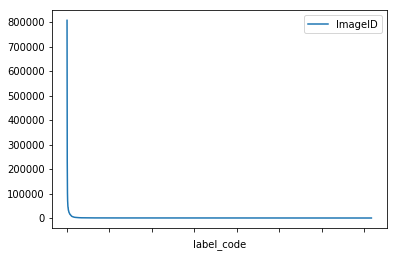

In [71]:
label_hmn_train_cnt.plot()

In [72]:
(label_hmn_train_cnt==1).sum()

ImageID    4
dtype: int64

In [73]:
label_mch_train_['label_code'].nunique()

4561

In [74]:
label_mch_train_cnt = label_mch_train_[['ImageID','label_code']].groupby('label_code').count()

In [75]:
label_mch_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [76]:
label_mch_train_cnt.head()

,ImageID
label_code,
/m/0jjw,113690
/m/09g5pq,105216
/m/06ntj,83339
/m/0c9ph5,77177
/m/01g6gs,72831


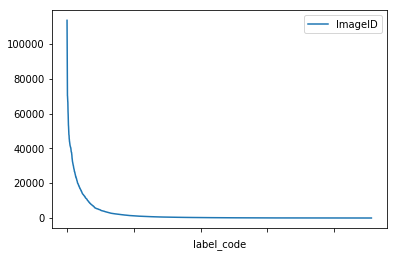

In [77]:
label_mch_train_cnt.plot()

In [78]:
(label_mch_train_cnt==1).sum()

ImageID    100
dtype: int64

In [79]:
label_bbox_train_['label_code'].nunique()

553

In [80]:
label_bbox_train_cnt = label_bbox_train_[['ImageID','label_code']].groupby('label_code').count()

In [81]:
label_bbox_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [82]:
label_bbox_train_cnt.head()

,ImageID
label_code,
/m/09j2d,1438128
/m/07j7r,1051270
/m/0dzct,1037702
/m/01g317,1034685
/m/09j5n,744473


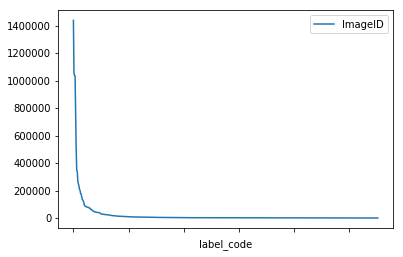

In [83]:
label_bbox_train_cnt.plot()

In [84]:
label_bbox_train_cnt.max(), label_bbox_train_cnt.min()

(ImageID    1438128
 dtype: int64, ImageID    35
 dtype: int64)

In [85]:
label_hmn_train_['source'] = 'human'
label_mch_train_['source'] = 'machine'
label_bbox_train_['source'] = 'bbox'

In [86]:
label_train_ = pd.concat([label_hmn_train_, label_bbox_train_, label_mch_train_])
label_train_ = label_train_.merge(right=class_desc, on='label_code', how='left')
label_train_.reset_index(drop=True, inplace=True)
label_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax,source,description
0,000002b66c9c498e,1.0,/m/01kcnl,0.0,0.0,1.0,1.0,human,Birthday
1,000002b66c9c498e,1.0,/m/0b6w2z,0.0,0.0,1.0,1.0,human,Buttercream
2,000002b66c9c498e,1.0,/m/09q2t,0.0,0.0,1.0,1.0,human,Brown
3,000002b66c9c498e,1.0,/m/09j2d,0.0,0.0,1.0,1.0,human,Clothing
4,000002b66c9c498e,1.0,/m/09g5pq,0.0,0.0,1.0,1.0,human,People


In [87]:
pd.DataFrame({'classes':label_train_['label_code'].unique()}).to_csv('../input/train_images/train_all/classes.csv', index=False)

In [88]:
# label_train_.to_csv('input/label_train.csv', index=False)

In [ ]:
label_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax,source,description
0,000002b66c9c498e,1.0,/m/01kcnl,0.0,0.0,1.0,1.0,human,Birthday
1,000002b66c9c498e,1.0,/m/0b6w2z,0.0,0.0,1.0,1.0,human,Buttercream
2,000002b66c9c498e,1.0,/m/09q2t,0.0,0.0,1.0,1.0,human,Brown
3,000002b66c9c498e,1.0,/m/09j2d,0.0,0.0,1.0,1.0,human,Clothing
4,000002b66c9c498e,1.0,/m/09g5pq,0.0,0.0,1.0,1.0,human,People


In [ ]:
flag_bbox =  ~((label_train_['XMin']==0.) & (label_train_['YMin']==0.) & (label_train_['XMax']==1.) & (label_train_['YMax']==1.) )

In [ ]:
label_train_1 = label_train_.loc[flag_bbox, ['ImageID', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']]

In [ ]:
label_train_1.shape

(12135951, 6)

In [ ]:
label_train_1.reset_index(drop=True, inplace=True)

In [ ]:
label_train_1['w_bbox'] = 1024*(label_train_1['XMax']-label_train_1['XMin'])
label_train_1['h_bbox'] = 768*(label_train_1['YMax']-label_train_1['YMin'])

In [ ]:
((label_train_1['w_bbox']<20)&(label_train_1['h_bbox']<20)).sum()

471742

In [ ]:
((label_train_1['w_bbox']<10)|(label_train_1['h_bbox']<10)).sum()

291182

In [ ]:
label_train_1.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox
0,2c4fa270b5971e47,/m/09j2d,0.306667,0.805625,0.372500,0.889375,67.412992,64.320000
1,7d51db71b4fc5423,/m/0199g,0.426061,0.375000,0.610542,0.472656,188.908544,74.999808
2,ca5f3777141d2190,/m/0k65p,0.270000,0.528243,0.364375,0.776151,96.640000,190.393344
3,7827e908eba595fd,/m/09j2d,0.000000,0.228333,0.075625,0.780833,77.440000,424.320000
4,f80ca2781911da6c,/m/07j7r,0.246250,0.393333,0.591250,0.871667,353.280000,367.360512


In [ ]:
label_train_1.drop(index=label_train_1.index[ ((label_train_1['w_bbox']<20)&(label_train_1['h_bbox']<20)) |
                                              ((label_train_1['w_bbox']<10)|(label_train_1['h_bbox']<10)) ], inplace=True)
label_train_1.reset_index(inplace=True, drop=True)

In [ ]:
label_train_1.shape

(11576529, 8)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit as SSS

In [ ]:
sss = SSS(n_splits=1, test_size=50000./label_train_1.shape[0], random_state=42)
label_bbox_train_test_idx = sss.split(np.zeros(label_train_1.shape[0]), label_train_1['label_code'])
label_bbox_train_idx, label_bbox_test_idx = next(label_bbox_train_test_idx)

In [ ]:
label_bbox_test_idx.shape

(50000,)

In [ ]:
label_train_1['label_code'].nunique()

553

In [ ]:
label_train_1.loc[label_bbox_test_idx, 'label_code'].nunique()

544

In [ ]:
label_train_1.loc[label_bbox_train_idx, 'label_code'].nunique()

553

In [ ]:
label_train_1.loc[7943065,:]

ImageID       875794bc2c8c4be6
label_code            /m/09j2d
XMin                    0.4975
YMin                      0.47
XMax                  0.554375
YMax                  0.549167
w_bbox                   58.24
h_bbox                 60.8003
Name: 7943065, dtype: object

In [ ]:
label_bbox_train = label_train_1.loc[label_bbox_train_idx, :].reset_index(drop=True)
label_bbox_test = label_train_1.loc[label_bbox_test_idx, :].reset_index(drop=True)

In [ ]:
label_bbox_train.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox
0,2ef29be9adc3d294,/m/09j5n,0.081875,0.655722,0.115000,0.707317,33.920000,39.624960
1,d3e0a2a04b125bf6,/m/04rky,0.425000,0.245000,0.451875,0.369167,27.520000,95.360256
2,a6a339aa0061d196,/m/01g317,0.249375,0.198670,0.425625,0.999169,180.480000,614.783232
3,0e050b9c776da380,/m/05s2s,0.000000,0.551929,0.997778,0.997033,1021.724672,341.839872
4,77b7e04ae589939e,/m/09j2d,0.689375,0.377715,0.784375,0.514636,97.280000,105.155328


In [ ]:
label_bbox_train_cnt = label_bbox_train[['ImageID','label_code']].groupby('label_code').count()

In [ ]:
label_bbox_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [ ]:
label_bbox_train_cnt.head()

,ImageID
label_code,
/m/09j2d,1409033
/m/07j7r,1030940
/m/01g317,1005692
/m/0dzct,987291
/m/09j5n,623902


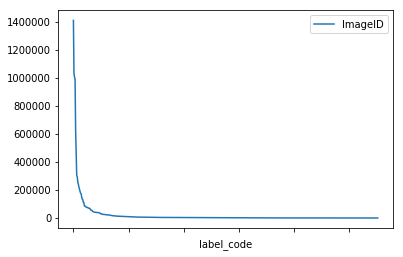

In [ ]:
label_bbox_train_cnt.plot()

In [ ]:
label_bbox_train_cnt.max()

ImageID    1409033
dtype: int64

In [ ]:
label_bbox_train_cnt.min()

ImageID    35
dtype: int64

In [ ]:
label_bbox_train_cnt.iloc[287]

ImageID    1417
Name: /m/01nq26, dtype: int64

In [ ]:
label_bbox_train_cnt['ratio_max'] = label_bbox_train_cnt['ImageID'].max() / label_bbox_train_cnt['ImageID']

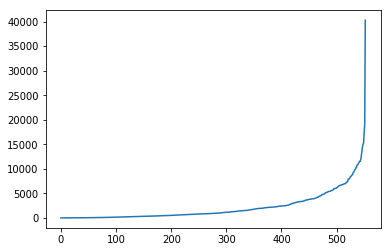

In [ ]:
plt.plot(list(map(lambda x: [x], np.arange(label_bbox_train_cnt.shape[0]))), label_bbox_train_cnt['ratio_max'])

In [ ]:
def curvature(x):
    d1 = np.diff(x)
    d2 = np.diff(d1)
    return abs(d2)*(1 + d1[:-1]**2)**-1.5

In [ ]:
c = curvature(label_bbox_train_cnt['ImageID'])

In [ ]:
c.argmax()

117

In [ ]:
label_bbox_train_cnt.iloc[73]

ImageID      16175.000000
ratio_max       87.111777
Name: /m/0zvk5, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression as LR

In [ ]:
X = list(map(lambda x: [x], np.arange(label_bbox_train_cnt.shape[0])))
reg = LR().fit(X, label_bbox_train_cnt['ratio_max'])
y = reg.predict(X)

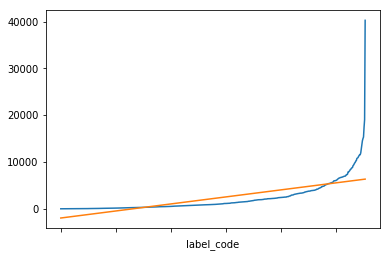

In [ ]:
label_bbox_train_cnt['ratio_max'].plot()
plt.plot(X, y)

In [ ]:
(label_bbox_train_cnt['ImageID']<100).sum()

6

In [ ]:
(label_bbox_train_cnt['ratio_max']>10000).sum()

18

In [ ]:
label_bbox_train_cnt.iloc[-7:,:]

,ImageID,ratio_max
label_code,,
/m/065h6l,103,13679.932039
/m/03jbxj,97,14526.113402
/m/02ctlc,94,14989.712766
/m/0ky7b,92,15315.576087
/m/074d1,81,17395.469136
/m/07v9_z,74,19040.986486
/m/03qhv5,35,40258.085714


In [ ]:
label_bbox_train_cnt.head()

,ImageID,ratio_max
label_code,,
/m/09j2d,1409033,1.000000
/m/07j7r,1030940,1.366746
/m/01g317,1005692,1.401058
/m/0dzct,987291,1.427171
/m/09j5n,623902,2.258420


In [ ]:
num_sample_min = 600
num_sample_max = 6000
label_bbox_train_cnt['weight_class'] = -(num_sample_max-num_sample_min)/label_bbox_train_cnt.shape[0] * np.arange(label_bbox_train_cnt.shape[0]) + num_sample_max
label_bbox_train_cnt['weight_class'] = label_bbox_train_cnt['weight_class'].map(lambda x: int(x))

# weight to feed to loss
num_sample_min = 100
num_sample_max = 1
label_bbox_train_cnt['weight_class_'] = -(num_sample_max-num_sample_min)/label_bbox_train_cnt.shape[0] * np.arange(label_bbox_train_cnt.shape[0]) + num_sample_max

# label_bbox_train_cnt['weight_class'] = label_bbox_train_cnt['ImageID']
# label_bbox_train_cnt.loc[label_bbox_train_cnt['ImageID']<=1000, 'weight_class'] = 1000
# label_bbox_train_cnt.loc[label_bbox_train_cnt['ImageID']>=10000, 'weight_class'] = 10000

In [ ]:
label_bbox_train_cnt.head()

,ImageID,ratio_max,weight_class,weight_class_
label_code,,,,
/m/09j2d,1409033,1.000000,6000,1.000000
/m/07j7r,1030940,1.366746,5990,1.179024
/m/01g317,1005692,1.401058,5980,1.358047
/m/0dzct,987291,1.427171,5970,1.537071
/m/09j5n,623902,2.258420,5960,1.716094


In [ ]:
label_bbox_train_cnt['weight_class'].sum()

1827324

In [ ]:
label_bbox_train_cnt.reset_index(inplace=True, drop=False)

In [ ]:
label_bbox_train_cnt.shape

(553, 5)

In [ ]:
label_bbox_train_cnt.iloc[-3:,0]

550     /m/074d1
551    /m/07v9_z
552    /m/03qhv5
Name: label_code, dtype: object

In [ ]:
label_bbox_train_cnt.iloc[-3:,:]

,label_code,ImageID,ratio_max,weight_class,weight_class_
550,/m/074d1,81,17395.469136,629,99.462929
551,/m/07v9_z,74,19040.986486,619,99.641953
552,/m/03qhv5,35,40258.085714,609,99.820976


In [ ]:
# label_bbox_train.drop(columns='weight_class', inplace=True)

In [ ]:
label_bbox_train.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox
0,2ef29be9adc3d294,/m/09j5n,0.081875,0.655722,0.115000,0.707317,33.920000,39.624960
1,d3e0a2a04b125bf6,/m/04rky,0.425000,0.245000,0.451875,0.369167,27.520000,95.360256
2,a6a339aa0061d196,/m/01g317,0.249375,0.198670,0.425625,0.999169,180.480000,614.783232
3,0e050b9c776da380,/m/05s2s,0.000000,0.551929,0.997778,0.997033,1021.724672,341.839872
4,77b7e04ae589939e,/m/09j2d,0.689375,0.377715,0.784375,0.514636,97.280000,105.155328


In [ ]:
label_bbox_train = pd.merge(left=label_bbox_train[['ImageID', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']], 
                            right=label_bbox_train_cnt[['label_code', 'weight_class']], 
                            on='label_code', how='left')

In [ ]:
label_bbox_train.shape

(11526529, 7)

In [ ]:
label_bbox_train.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,weight_class
0,2ef29be9adc3d294,/m/09j5n,0.081875,0.655722,0.115000,0.707317,5960
1,d3e0a2a04b125bf6,/m/04rky,0.425000,0.245000,0.451875,0.369167,5853
2,a6a339aa0061d196,/m/01g317,0.249375,0.198670,0.425625,0.999169,5980
3,0e050b9c776da380,/m/05s2s,0.000000,0.551929,0.997778,0.997033,5921
4,77b7e04ae589939e,/m/09j2d,0.689375,0.377715,0.784375,0.514636,6000


In [ ]:
# label_bbox_train.to_csv('input/label_bbox_train.csv', index=False)

In [ ]:
class_desc_train.head()

,label_code,description
0,/m/0108_09c,Summer snowflake
1,/m/010dmf,Isle of man tt
2,/m/010jjr,Amusement park
3,/m/010l12,Roller coaster
4,/m/010lq47b,Witch hat


In [ ]:
label_bbox_desc = label_bbox_train[['label_code','ImageID']].drop_duplicates(subset='label_code')
label_bbox_desc = label_bbox_desc.merge(right=class_desc_train, on='label_code', how='left').drop(columns='ImageID')

In [ ]:
label_bbox_desc = label_bbox_desc.merge(right=label_bbox_train_cnt[['label_code', 'weight_class_']], on='label_code', how='left')

In [ ]:
label_bbox_desc.head()

,label_code,description,weight_class_
0,/m/09j5n,Footwear,1.716094
1,/m/04rky,Mammal,3.685353
2,/m/01g317,Person,1.358047
3,/m/05s2s,Plant,2.432188
4,/m/09j2d,Clothing,1.000000


In [ ]:
label_bbox_desc.shape

(553, 3)

In [ ]:
# label_bbox_desc.to_csv('input/label_bbox_desc.csv', index=False)

In [ ]:
label_bbox_test['weight_class'] = 0

In [ ]:
label_bbox_test.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox,weight_class
0,2695ac46fb0a0f9f,/m/04brg2,0.508750,0.640833,0.734375,0.744167,231.040000,79.360512,0
1,36e3331f700a77b8,/m/08pbxl,0.003750,0.272983,0.647500,0.986867,659.200000,548.262912,0
2,8383969c462eb13c,/m/0d4v4,0.640625,0.480234,0.650391,0.546120,10.000384,50.600448,0
3,0fb1e7478e12ab68,/m/0dzct,0.473750,0.137899,0.577500,0.313321,106.240000,134.724096,0
4,319e1ab5517abbfb,/m/09j5n,0.416016,0.869565,0.465820,0.898551,50.999296,22.261248,0


In [ ]:
# label_bbox_test[['ImageID', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax', 'weight_class']].to_csv('input/label_bbox_valid.csv', index=False)

In [ ]:
# label_bbox_test.sample(frac=0.1).to_csv('input/label_bbox_valid_01.csv', index=False)

In [ ]:
label_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax,source,description
0,000002b66c9c498e,1.0,/m/01kcnl,0.0,0.0,1.0,1.0,human,Birthday
1,000002b66c9c498e,1.0,/m/0b6w2z,0.0,0.0,1.0,1.0,human,Buttercream
2,000002b66c9c498e,1.0,/m/09q2t,0.0,0.0,1.0,1.0,human,Brown
3,000002b66c9c498e,1.0,/m/09j2d,0.0,0.0,1.0,1.0,human,Clothing
4,000002b66c9c498e,1.0,/m/09g5pq,0.0,0.0,1.0,1.0,human,People


In [ ]:
label_train_0_ = label_train_.loc[~flag_bbox, :]

In [ ]:
label_train_0_.shape

(18535506, 9)

In [ ]:
label_train_0_cnt = label_train_0_[['ImageID', 'label_code']].groupby('label_code').count().sort_values(by='ImageID', ascending=False)

In [ ]:
label_train_0_cnt.head()

,ImageID
label_code,
/m/01g317,813340
/m/09j2d,617387
/m/0dzct,334534
/m/07j7r,332999
/m/05s2s,308986


In [ ]:
label_train_0_cnt.iloc[-2809,:]

ImageID    99
Name: /m/01_3kg, dtype: int64

In [ ]:
(label_train_0_cnt['ImageID']<100).sum()

2809

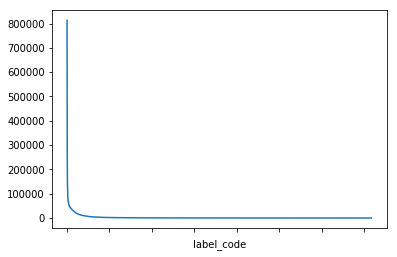

In [ ]:
label_train_0_cnt['ImageID'].plot()

In [ ]:
num_sample_min = 30
num_sample_max = 4000
label_train_0_cnt['weight_class'] = -(num_sample_max-num_sample_min)/label_train_0_cnt.shape[0] * np.arange(label_train_0_cnt.shape[0]) + num_sample_max
label_train_0_cnt['weight_class'] = label_train_0_cnt['weight_class']#.map(lambda x: int(x))

# weight to feed to loss
num_sample_min = 100
num_sample_max = 1
label_train_0_cnt['weight_class_'] = -(num_sample_max-num_sample_min)/label_train_0_cnt.shape[0] * np.arange(label_train_0_cnt.shape[0]) + num_sample_max


In [ ]:
label_train_0_cnt['weight_class'].sum()

14455580.0

In [ ]:
label_train_0_cnt.reset_index(inplace=True, drop=False)

In [ ]:
label_train_0_cnt.shape

(7173, 4)

In [ ]:
label_train_0_cnt.head(10)

,label_code,ImageID,weight_class,weight_class_
0,/m/01g317,813340,4000.000000,1.000000
1,/m/09j2d,617387,3999.446536,1.013802
2,/m/0dzct,334534,3998.893071,1.027604
3,/m/07j7r,332999,3998.339607,1.041405
4,/m/05s2s,308986,3997.786142,1.055207
5,/m/07yv9,262845,3997.232678,1.069009
6,/m/0cgh4,200383,3996.679214,1.082811
7,/m/01prls,169157,3996.125749,1.096612
8,/m/0c9ph5,156023,3995.572285,1.110414
9,/m/0jbk,147780,3995.018821,1.124216


In [ ]:
label_train_0_cnt['ImageID'].sum()

18535506

In [ ]:
(label_train_0_cnt['ImageID']<1000).sum()

5755

In [ ]:
label_train_0_ = pd.merge(left=label_train_0_[['ImageID', 'label_code',]], 
                            right=label_train_0_cnt[['label_code', 'weight_class']], 
                            on='label_code', how='left')

In [ ]:
label_train_0_.head()

,ImageID,label_code,weight_class
0,000002b66c9c498e,/m/01kcnl,3253.930015
1,000002b66c9c498e,/m/0b6w2z,3578.260142
2,000002b66c9c498e,/m/09q2t,3781.381570
3,000002b66c9c498e,/m/09j2d,3999.446536
4,000002b66c9c498e,/m/09g5pq,3992.251499


In [ ]:
label_train_0_[['ImageID', 'weight_class']].groupby('ImageID').max()['weight_class'].unique().sum()

2618311.456852084

In [ ]:
label_train_0_[['ImageID', 'weight_class']].groupby('ImageID').max().shape

(1742996, 1)

In [ ]:
label_train_0_[['ImageID', 'weight_class']].groupby('ImageID').max()['weight_class'].nunique()

739

In [ ]:
label_train_0 = label_train_0_.groupby('ImageID').agg({'label_code': lambda x: [i for i in x]})
label_train_0['weight_class'] = label_train_0_.groupby('ImageID').agg({'weight_class': lambda x: np.max(x)})

In [ ]:
label_train_0.head()

In [ ]:
label_train_0['weight_class'].min(), label_train_0['weight_class'].sum()

In [ ]:
label_train_0['label_code'] = label_train_0['label_code'].map(lambda x: ','.join(x))
label_train_0.reset_index(inplace=True, drop=False)

In [ ]:
label_train_0.head()

In [ ]:
label_train_0.shape

In [ ]:
label_train_0_val = label_train_0.sample(n=50000, random_state=42)

In [ ]:
label_train_0_val.head()

In [ ]:
label_train_0_trn = label_train_0.loc[label_train_0.index.difference(label_train_0_val.index), :]

In [ ]:
label_train_0_trn.shape

In [ ]:
label_train_0_trn.head()

In [ ]:
label_train_0_trn['weight_class'].unique().sum()

In [ ]:
label_train_0_trn.reset_index(inplace=True, drop=True)
label_train_0_val.reset_index(inplace=True, drop=True)

In [ ]:
# label_train_0_trn['weight_class'] = label_train_0_trn['weight_class'].map(lambda x: int(x))
# label_train_0_val['weight_class'] = label_train_0_val['weight_class'].map(lambda x: int(x))

In [ ]:
label_train_0_trn.head()

In [ ]:
# label_train_0_trn[['ImageID', 'label_code', 'weight_class']].to_csv('input/label_hmn_mch_train.csv', index=False)
# label_train_0_val[['ImageID', 'label_code', 'weight_class']].to_csv('input/label_hmn_mch_valid.csv', index=False)

In [ ]:
class_desc_train.head()

In [ ]:
label_train_0_cnt.shape

In [ ]:
label_desc_0 = class_desc_train.merge(right=label_train_0_cnt[['label_code', 'weight_class_']], on='label_code', how='right')

In [ ]:
label_desc_0.head()

In [ ]:
label_desc_0.shape

In [ ]:
# label_desc_0.to_csv('input/label_hmn_mch_desc.csv', index=False)

In [ ]:
label_train_01 = pd.concat([label_train_0, label_train_1]).reset_index(inplace=False, drop=True)

In [ ]:
label_train_01.shape

In [ ]:
label_train_01.head()

In [ ]:
label_train_test = label_train_.loc[~flag_bbox, ['ImageID', 'label_code']]

In [ ]:
label_train_test.head()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit as SSS

In [ ]:
sss = SSS(n_splits=20, test_size=0.005, random_state=42)

In [ ]:
label_train_test.shape

In [ ]:
# label_train_cnt.index[label_train_cnt['ImageID']==1]
onesample = ['/m/0266h', '/m/0cvt8m', '/m/05q3k']
label_train_test.drop(inplace=True, index=label_train_test.index[ [i in onesample for i in label_train_test['label_code']] ])

In [ ]:
label_train_test.reset_index(inplace=True, drop=True)

In [ ]:
label_train_test.shape

In [ ]:
indices = sss.split(np.zeros([label_train_test.shape[0],1]),label_train_test['label_code'])

In [ ]:
train_index, test_index = next(indices)

In [ ]:
train_index.shape

In [ ]:
test_index.shape

In [ ]:
label_train_test['label_code'].nunique()

In [ ]:
label_train_test.loc[train_index,'label_code'].nunique()

In [ ]:
label_train_test.loc[test_index,'label_code'].nunique()

In [ ]:
label_train_00 = label_train_test.loc[train_index, :].groupby('ImageID').agg({'label_code': lambda x: [i for i in x]})

In [ ]:
label_train_00.shape

In [ ]:
label_test = label_train_test.loc[test_index, :].groupby('ImageID').agg({'label_code': lambda x: [i for i in x]})

In [ ]:
label_test.shape

In [ ]:
label_train_00['XMin'] = 0.
label_train_00['YMin'] = 0.
label_train_00['XMax'] = 1.
label_train_00['YMax'] = 1.
# label_train_00['description'] = label_train_00['label_code'].map(lambda x: [label2desc_train.loc[i, 'description'] for i in x])
label_train_00['label_code'] = label_train_00['label_code'].map(lambda x: ','.join(x))
label_train_00.reset_index(inplace=True, drop=False)

In [ ]:
label_test['XMin'] = 0.
label_test['YMin'] = 0.
label_test['XMax'] = 1.
label_test['YMax'] = 1.
# label_test['description'] = label_test['label_code'].map(lambda x: [label2desc_train.loc[i, 'description'] for i in x])
label_test['label_code'] = label_test['label_code'].map(lambda x: ','.join(x))
label_test.reset_index(inplace=True, drop=False)

In [ ]:
# label_train_01.to_csv('input/label_train_01.csv', index=False)

In [ ]:
label_train_labelclass = pd.DataFrame({'label_code':label_train_['label_code'].unique()})

In [ ]:
label_train_labelclass['description'] = label_train_labelclass['label_code'].map(lambda x: label2desc_train.loc[x, 'description'])

In [ ]:
label_train_labelclass.head()

In [ ]:
label_train_labelclass.shape

In [ ]:
# label_train_labelclass.to_csv('input/label_desc.csv', index=False)

In [ ]:
label_train_.shape

In [ ]:
label_train_['ImageID'].nunique()

In [ ]:
label_train_.duplicated().sum()

In [ ]:
label_train_.groupby(['ImageID', 'label_code']).ngroups

In [ ]:
# label_train = pd.merge(left=label_hmn_train, right=label_mch_train, on=['ImageID', 'label_code'], how='outer', suffixes=['_hmn', '_mch']).reset_index(drop=True)

In [ ]:
18535506-5126334-11417764

In [ ]:
label_train_['label_code'].nunique()

In [ ]:
label_train_cnt = label_train_[['ImageID','label_code']].groupby('label_code').count()

In [ ]:
label_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [ ]:
label_train_cnt.head()

In [ ]:
label_train_cnt.iloc[1000:, 0].plot()

In [ ]:
label_train_cnt['ratio_max'] = label_train_cnt['ImageID'].max() / label_train_cnt['ImageID']

In [ ]:
label_train_cnt['ratio_max'].plot()

In [ ]:
label_train_cnt

In [ ]:
label_train_cnt.index[label_train_cnt['ImageID']==1]

In [ ]:
# label_train.shape

In [ ]:
# label_train.loc[label_train['Confidence_mch'].isnull(), 'label_code'].nunique()
# label_train.loc[:, 'label_code'].nunique()

In [ ]:
# label_train.head()

In [ ]:
# label_train['Confidence_mch'].std()

In [ ]:
# t = pd.merge(left=label_hmn_train[~label_hmn_train['label_code'].duplicated()], \
#              right=label_mch_train[~label_mch_train['label_code'].duplicated()], \
#              on='label_code', how='inner')
# t.shape

In [ ]:
label_tun = pd.read_csv('../input/tuning_labels.csv', names=['id', 'labels'], index_col='id')

In [ ]:
label_tun.head()

In [ ]:
pop_labels_tun = label_tun['labels'].str.split().apply(pd.Series).stack().value_counts().head(10).index.tolist()

In [ ]:
pop_labels_trn = label_train_0_cnt.head(10)['label_code'].tolist()

In [ ]:
pop_labels_trn

In [ ]:
[label2desc_train.loc[ii, 'description'] for ii in pop_labels_tun]

In [ ]:
[label2desc_train.loc[ii, 'description'] for ii in pop_labels_trn]

In [ ]:
label_tun.shape

In [ ]:
from matplotlib import pyplot as plt
import cv2

In [ ]:
label_hmn_6 = ['000002b66c9c498e', '000002b97e5471a0', '000002c707c9895e', '0000048549557964', '000004f4400f6ec5', '0000071d71a0a6f6']

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 15))
ax.set_axis_off()
n = 0
for row in label_hmn_6:
    a = fig.add_subplot(2, 3, n+1)
    img = plt.imread('../input/train_images/train_all/'+row+'.jpg')
    box = bbox_train[bbox_train['ImageID'] == row]
    h, w = img.shape[:2]
    for idx, row in box.iterrows():
        img = cv2.rectangle(img, (int(row.XMin*w), int(row.YMin*h)), (int(row.XMax*w), int(row.YMax*h)), (0,255,0), 4)
#     label = class_desc.loc[class_desc['image_id'] == row[0], 'Description'].str.cat(sep=',')
#     plt.title(label, fontsize=10)
    plt.axis('off')
    plt.imshow(img)
    n += 1

In [ ]:
row = 'd13f02d0775b1c6d'
print(label_train_.loc[label_train_.ImageID == row, ['description','Confidence', 'source']])
img = plt.imread('../input/train_images/train_all/'+row+'.jpg')
box = bbox_train[bbox_train['ImageID'] == row]
h, w = img.shape[:2]
for idx, row in box.iterrows():
#     if row.description == 'Human ear':
        img = cv2.rectangle(img, (int(row.XMin*w), int(row.YMin*h)), (int(row.XMax*w), int(row.YMax*h)), (0,255,0), 4)
        print(row['description'])
plt.axis('off')
plt.imshow(img)

In [ ]:
h, w